### Image Classifier with Keras and CNN for the Fashion_MNIST dataset

* The dataset contains 10 labels of different clothing types with 28x28 grayscale images.

* Training set of 60000 images and test set of 10000 images

    Label	Description
    -----   -----------
     0	     T-shirt/top
     1	     Trouser
     2	     Pullover
     3	     Dress
     4	     Coat
     5	     Sandal
     6	     Shirt
     7	     Sneaker
     8	     Bag
     9	     Ankle boot

### Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


### Visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

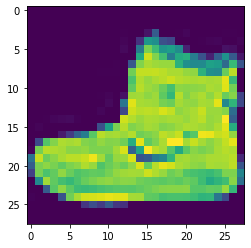

In [5]:
plt.imshow(x_train[0])

In [7]:
y_train[0]

9

### PreProcessing the Data

##### `Scaling`

In [8]:
x_train.max()

255

In [9]:
x_train = x_train/255

In [10]:
x_test = x_test/255

##### `Reshape`

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(10000, 28, 28, 1)

##### `OneHotEncoding`

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_cat_train = to_categorical(y_train)

In [17]:
y_cat_test = to_categorical(y_test)

### Building the Model

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [24]:
model.fit(x_train, y_cat_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 485us/sample - loss: 0.2584 - accuracy: 0.9073
Epoch 2/10
60000/60000 [==============================] - 33s 542us/sample - loss: 0.2252 - accuracy: 0.9193
Epoch 3/10
60000/60000 [==============================] - 34s 567us/sample - loss: 0.2011 - accuracy: 0.9277
Epoch 4/10
60000/60000 [==============================] - 32s 540us/sample - loss: 0.1844 - accuracy: 0.9342
Epoch 5/10
60000/60000 [==============================] - 34s 563us/sample - loss: 0.1689 - accuracy: 0.9400
Epoch 6/10
60000/60000 [==============================] - 32s 534us/sample - loss: 0.1565 - accuracy: 0.9453
Epoch 7/10
60000/60000 [==============================] - 36s 596us/sample - loss: 0.1464 - accuracy: 0.9487
Epoch 8/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.1353 - accuracy: 0.9527
Epoch 9/10
60000/60000 [==============================] - 30s 498us/sample - loss: 0.1276 - accuracy: 0.9

### Evaluating the Model

In [25]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.3490668866932392, 0.9117]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
predictions = model.predict_classes(x_test)

In [32]:
predictions[0]

9

In [30]:
y_cat_test.shape

(10000, 10)

In [31]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.83      0.86      1000
           3       0.92      0.93      0.92      1000
           4       0.89      0.80      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.81      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [35]:
print(confusion_matrix(y_test, predictions))

[[876   2   6  13   3   0  94   1   5   0]
 [  2 979   1  11   2   1   3   0   1   0]
 [ 37   0 826   7  41   0  89   0   0   0]
 [ 17   3   6 930  13   0  31   0   0   0]
 [  1   1  53  26 803   0 115   0   1   0]
 [  0   0   0   1   0 978   0  10   1  10]
 [ 93   0  26  23  43   0 809   0   6   0]
 [  0   0   0   0   0   8   0 979   1  12]
 [  7   1   0   2   1   1   4   1 983   0]
 [  0   0   0   0   0   6   0  39   1 954]]
